In [1]:
# load the library
library(CAVAanalytics)
# ignore this line, it is just to visualize the plots using this notebook
Sys.setenv("PROJ_LIB" = "/opt/conda/envs/cava/share/proj")

Loading required package: loadeR.java

Loading required package: rJava

Java version 17x amd64 by N/A detected

NetCDF Java Library v4.6.0-SNAPSHOT (23 Apr 2015) loaded and ready



## 1st step: data loading
Loading the data is always the first step of CAVAanalytics. It is the second step that changes the most and it is where we perform different analyses.
The load_data functions allow users to load netcdf file stored locally (specific data structure has to be followed, for more info type ?loade_data) or remotely. In this notebook we will use CORDEX-CORE data stored remotely at the University of Cantabria server. This is one of the main feature of CAVAanalytics


In [6]:
# Type ?load_data to explore all options

exmp1 <- load_data(country = "Sudan", path.to.data = "CORDEX-CORE", variable = "pr", years.proj = 2020:2030, 
                   years.hist = 1980,
                   path.to.obs = NULL, domain = "AFR-22")



ℹ Accessing inventory

✔ Accessing inventory s]



ℹ Downloading CORDEX-CORE data (18 simulations). This might take a while. Using…

✔ Downloading CORDEX-CORE data (18 simulations). This might take a while. Using…



ℹ Downloaded 1.51 GB

ℹ Binding members and checking temporal consistency

✔ Binding members and checking temporal consistency [33.8s]



ℹ Precipitation has been converted into mm/day



## 2nd step: projections
Projections is one of the function available in step 2 of the CAVAanalytics framework. As the name gives away, it is used to look at future projections. There are several arguments in this function. 

In [8]:
# this funciton does several things in the background. 
# For example, it is possibl to calculate agroclimatic indicators by specifying lowert and uppert. 
# Those can be calculated only for daily data
proj <- projections(data=exmp1,season = 1:12)


ℹ  projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total  pr

ℹ Performing calculations

Warning message:
“There were 16 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `rst_ens_mean = purrr::map2(...)`.
Caused by warning:
! [mask] CRS do not match
ℹ Run `dplyr::last_dplyr_warnings()` to see the 15 remaining warnings.”
✔ Performing calculations [17.4s]





In [9]:
# let's now calculate the number of dry days for the whole year and specified time period
proj_dry_days <- projections(data=exmp1,season = 1:12, lowert = 1)


ℹ  projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of number of days with pr below threshold of 1

ℹ Performing calculations

Warning message:
“There were 16 warnings in `dplyr::mutate()`.
The first warning was:
ℹ In argument: `rst_ens_mean = purrr::map2(...)`.
Caused by warning:
! [mask] CRS do not match
ℹ Run `dplyr::last_dplyr_warnings()` to see the 15 remaining warnings.”
✔ Performing calculations [18.5s]





## 3rd step: plotting
Plotting allows us to visualize the results of step2 in a very flexible way

### Cumulative mean precipitation 

ℹ Visualizing ensemble mean

ℹ Plotting

✔ Plotting s]



ℹ Visualizing individual members, argument stat is ignored

ℹ Plotting

✔ Plotting s]





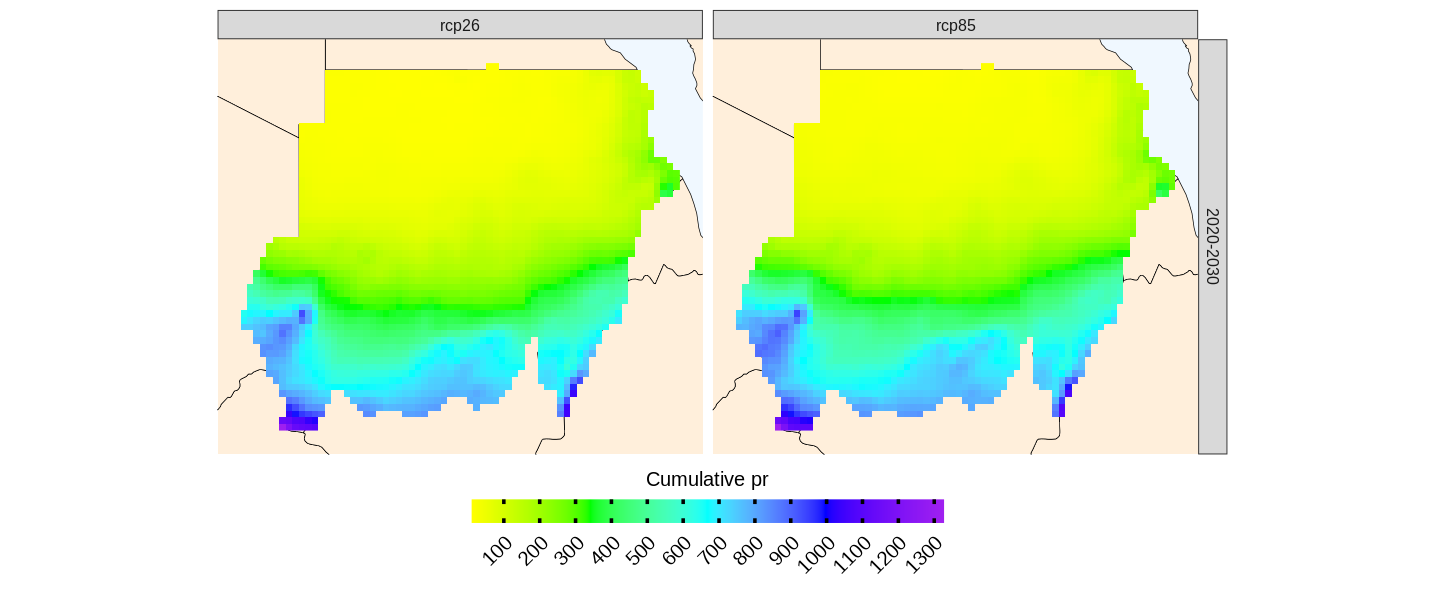

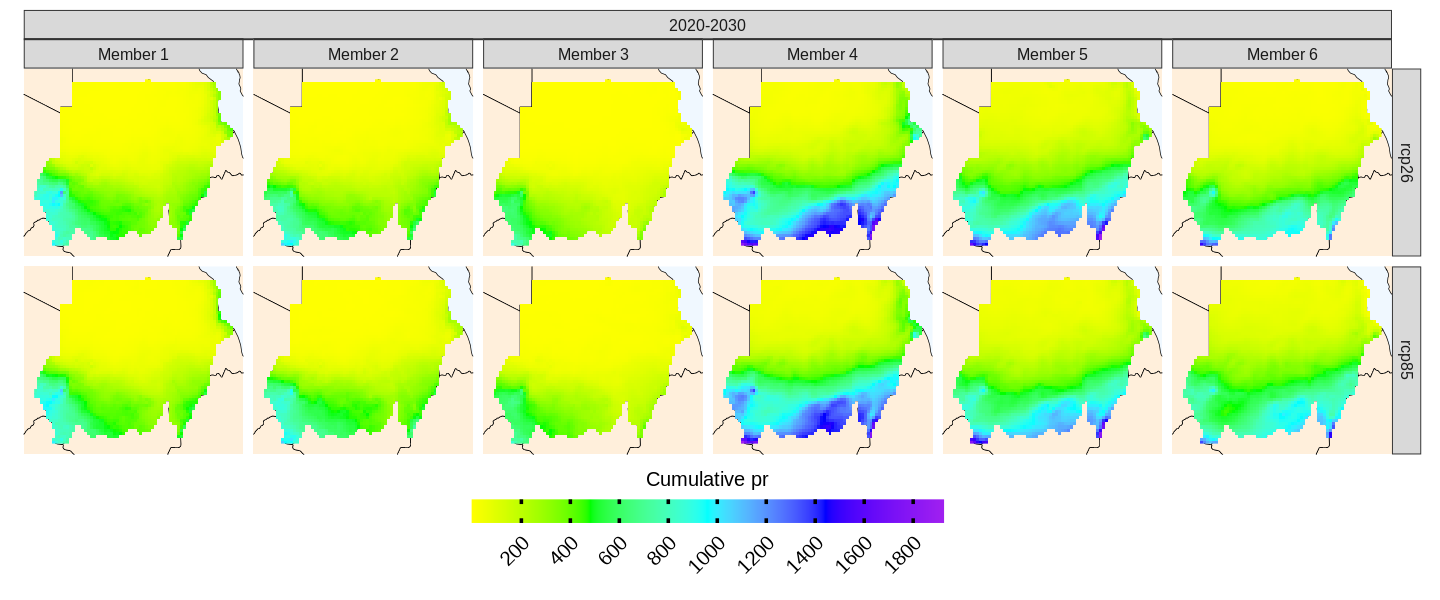

In [12]:
options(repr.plot.width=12, repr.plot.height=5)
# specify color palette with palette
plotting(proj, ensemble = TRUE, palette = c("yellow","green", "cyan", "blue", "purple"),
         plot_titles = "Cumulative pr")

plotting(proj, ensemble = FALSE, palette = c("yellow","green", "cyan", "blue", "purple"),
         plot_titles = "Cumulative pr")




ℹ Visualizing ensemble mean

ℹ Plotting

✔ Plotting s]





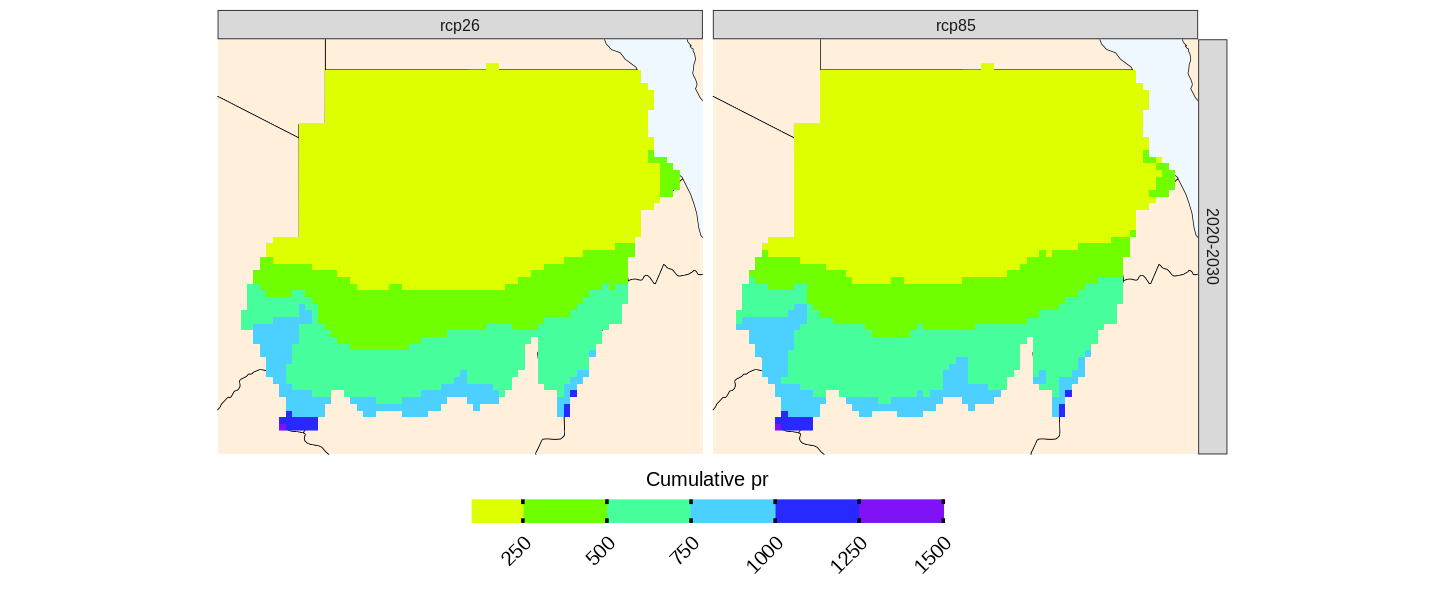

In [13]:
# make bins and assignnumber of bins
plotting(proj, ensemble = TRUE, palette = c("yellow","green", "cyan", "blue", "purple"), legend_range = c(100,1500),
         plot_titles = "Cumulative pr",alpha = NA, bins = TRUE,  n.bins=7)

ℹ Visualizing ensemble sd

ℹ Plotting

✔ Plotting s]





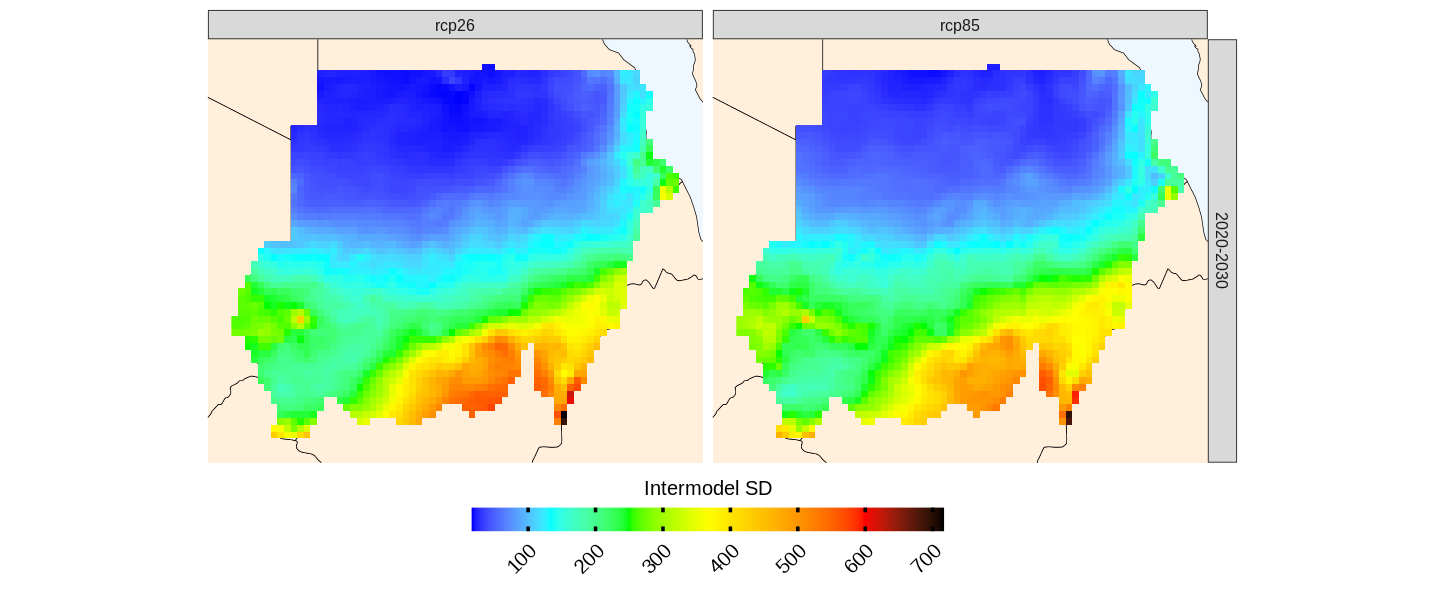

In [14]:
# It is also possible to look at the ensemble SD
plotting(proj, ensemble = TRUE,
         plot_titles = "Intermodel SD",  stat="sd")

### Thresholds

ℹ Visualizing ensemble mean

ℹ Plotting

✔ Plotting s]





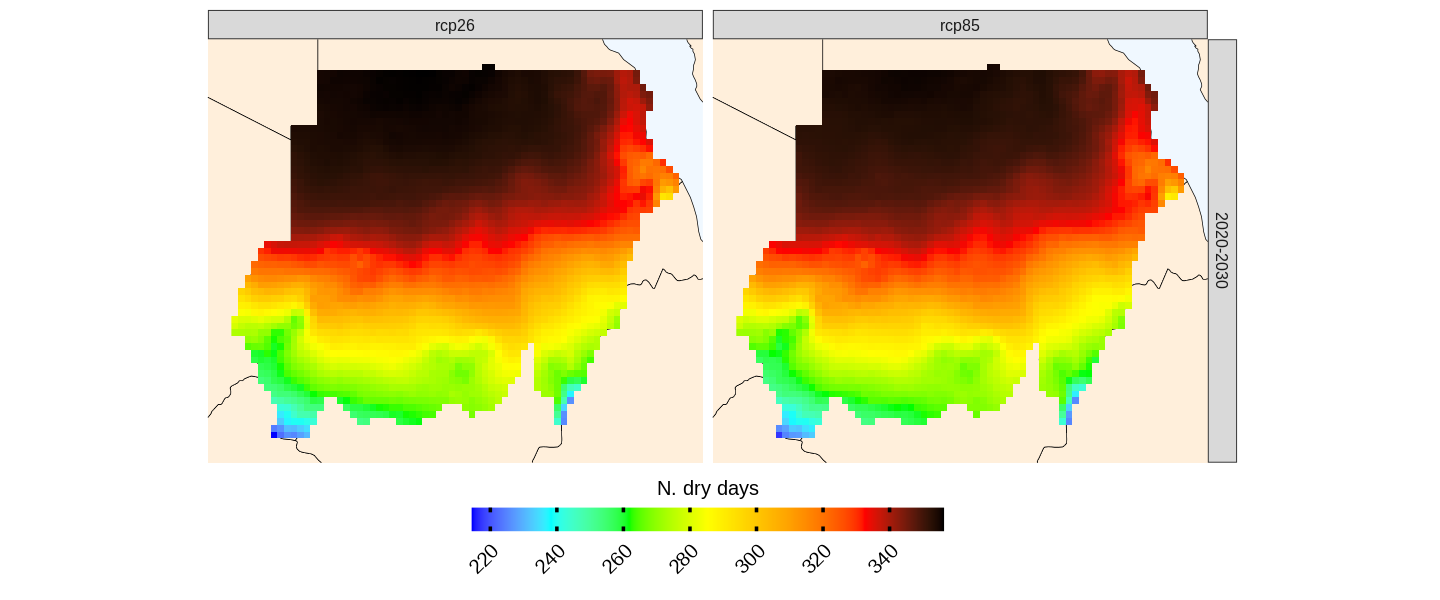

In [16]:
# we now visualize the calculation of the number of dry days
plotting(proj_dry_days , ensemble = TRUE,
         plot_titles = "N. dry days")

## What happen if we want to perform a calculation on a large area?
The above functions are quite memory intensive. This of course depends on how many years of data you are loading but also on the size of the region. If you are using your normal laptop, it is likely that you have available only 16Gb RAM. Even the above operations could potentially fail. You can monitor your RAM usage using htop or bashtop in linux OS.

To solve this issue, we combined the load_data step with the 2nd step so that the loading and calculations are performed sequentially on small chunks of spatial data. At the end of the process, the small rasters are merged together. Because the operations is performed sequentially, while slow, it saves memory allowing users to analyse entire CORDEX domains

In [17]:
# as you can see, this takes a lot of time to run. However, the amount of data retrieved is very big and 
# this function, despite being slow, allow users to process a lot of data even locally. 
# In this case, this notebook was run from the JupyterHub which has a lot of RAM available so chunk_size was relatively large (20). 
# To run this locally, consider lowering chunk_size to 5 or 2. Also, to make the process less intensive you could use agg.m="sum" to load
# monthly aggregated data instead of daily data

exmp1_chunk <-  load_data_and_projections(variable = "tasmax", years.hist = 1980:1982,
                                  years.proj = 2020:2023, path.to.data = "CORDEX-CORE",
                                  path.to.obs = NULL, xlim = c(10,50), ylim = c(-10,10), aggr.m="mean",
                                  chunk.size = 5, season = 1:12, domain="AFR-22")

✔ Loading and processing spatial CHUNK_1_1 . Coordinates  xlim= 9.75,15  ylim= -10.25,-5

✔ Loading and processing spatial CHUNK_1_2 . Coordinates  xlim= 9.75,15  ylim= -5.25,0

✔ Loading and processing spatial CHUNK_1_3 . Coordinates  xlim= 9.75,15  ylim= -0.25,5

✔ Loading and processing spatial CHUNK_1_4 . Coordinates  xlim= 9.75,15  ylim= 4.75,10

✔ Loading and processing spatial CHUNK_2_1 . Coordinates  xlim= 14.75,20  ylim= -10.25,-5

✔ Loading and processing spatial CHUNK_2_2 . Coordinates  xlim= 14.75,20  ylim= -5.25,0

✔ Loading and processing spatial CHUNK_2_3 . Coordinates  xlim= 14.75,20  ylim= -0.25,5

✔ Loading and processing spatial CHUNK_2_4 . Coordinates  xlim= 14.75,20  ylim= 4.75,10

✔ Loading and processing spatial CHUNK_3_1 . Coordinates  xlim= 19.75,25  ylim= -10.25,-5

✔ Loading and processing spatial CHUNK_3_2 . Coordinates  xlim= 19.75,25  ylim= -5.25,0

✔ Loading and processing spatial CHUNK_3_3 . Coordinates  xlim= 19.75,25  ylim= -0.25,5

✔ Loading and proce

ℹ Visualizing ensemble mean

ℹ Plotting

✔ Plotting s]





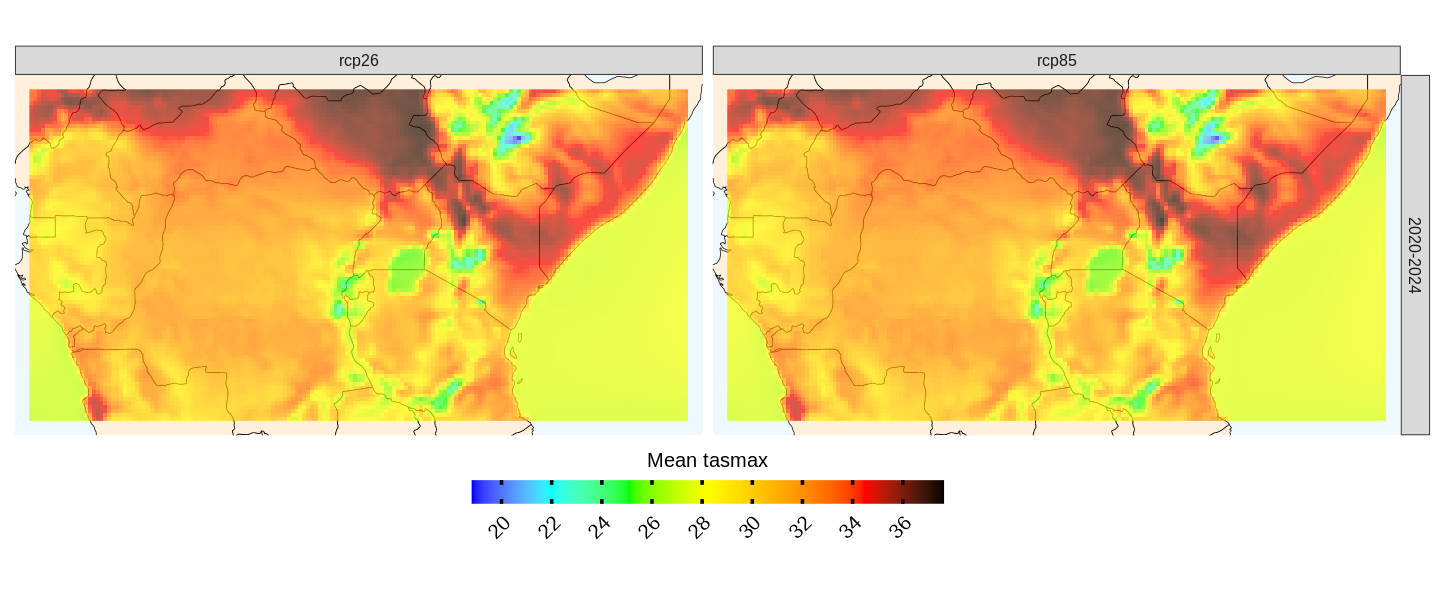

In [18]:
plotting(exmp1_chunk , ensemble = TRUE, palette = NULL, legend_range = NULL,
         plot_titles = "Mean tasmax", bins = F, alpha = 0.7)